<a href="https://colab.research.google.com/github/Shrey327/Machine_Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras

In [62]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [55]:
len(train_images)

60000

In [56]:
len(test_images)

10000

In [57]:
train_images[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [58]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [59]:
x_val = train_images[:1000]
partial_x_train = train_images[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [77]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)
results = model.evaluate(test_images, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')

Epoch 1/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8438 - loss: 0.5618 - val_accuracy: 0.9380 - val_loss: 0.2026
Epoch 2/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9493 - loss: 0.1744 - val_accuracy: 0.9550 - val_loss: 0.1497
Epoch 3/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9648 - loss: 0.1211 - val_accuracy: 0.9600 - val_loss: 0.1295
Epoch 4/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9727 - loss: 0.0915 - val_accuracy: 0.9620 - val_loss: 0.1131
Epoch 5/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9786 - loss: 0.0767 - val_accuracy: 0.9660 - val_loss: 0.1090
Epoch 6/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9824 - loss: 0.0595 - val_accuracy: 0.9760 - val_loss: 0.0948
Epoch 7/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9855 - loss: 0.0502 - val_accuracy: 0.9760 - val_loss: 0.0987
Epoch 8/20
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0426 - val_accuracy: 0.

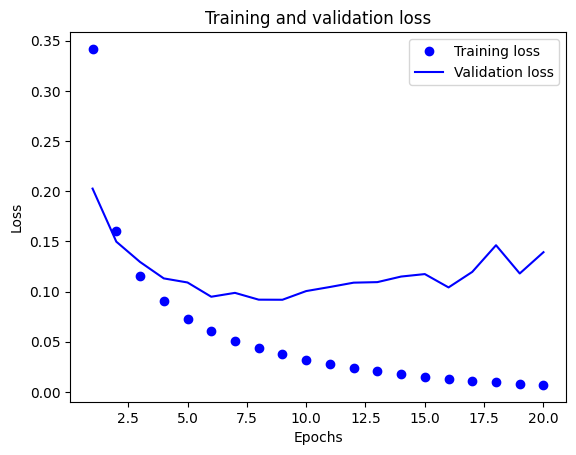

In [78]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

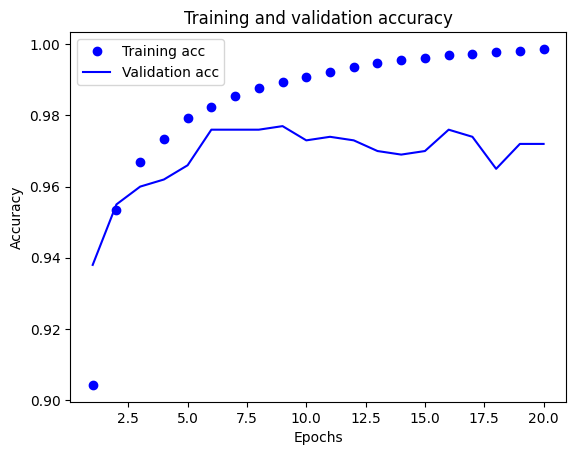

In [79]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [80]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=6,
          batch_size=128)

Epoch 1/6
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8501 - loss: 0.5553
Epoch 2/6
461/461 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9515 - loss: 0.1692
Epoch 3/6
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9663 - loss: 0.1183
Epoch 4/6
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9743 - loss: 0.0876
Epoch 5/6
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9790 - loss: 0.0718
Epoch 6/6
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9831 - loss: 0.0578


In [81]:
results = model.evaluate(test_images, y_test)
print(f'Test Loss: {results[0]}, Test Accuracy: {results[1]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 16.7229
Test Loss: 14.73995304107666, Test Accuracy: 0.9710000157356262


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels
y_true = np.argmax(y_test, axis=1)  # Get the true class labels

print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.91      0.99      0.95      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 974    0    0    3    0    1    0    1    1    0]
 [   0 1120    3    3    0    1    4    1    3    0]
 [   7    1  982   25    1    1    4    7    4    0]
 [   0    0    1 1002    0    1    0    4